In [2]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.signal as signal

current_dir = os.getcwd()
print(current_dir)
events_dir = os.path.join(current_dir, 'memes')
%matplotlib inline

/data/alpv95/MemeProject


In [19]:
steps = []
perps = []
for event in ["events.out.tfevents.1520366364.render1-neuroaicluster","events.out.tfevents.1520560288.render1-neuroaicluster"]: 
    for summary in tf.train.summary_iterator("im2txt/evallogInc/" + event):
        if (summary.step not in steps) and summary.step:
            steps.append(summary.step)
        for v in summary.summary.value:
            if v.tag == 'Perplexity':
                perps.append(v.simple_value)
            
if (len(perps) != len(steps)):
    steps.extend([1000000]*(len(perps)-len(steps)))

(1.4, 2.1)

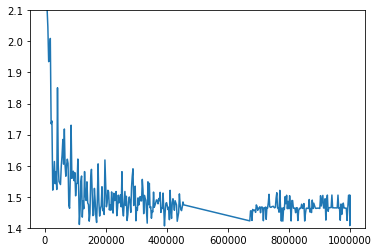

In [21]:
fig = plt.figure(1)
plt.title('Inception')
plt.plot(steps,perps)
plt.ylim(1.4,2.1)

In [17]:
steps = []
perps = []
for event in ["events.out.tfevents.1520371834.render1-neuroaicluster"]: 
    for summary in tf.train.summary_iterator("im2txt/evallogALEX/" + event):
        if (summary.step not in steps) and summary.step:
            steps.append(summary.step)
        for v in summary.summary.value:
            if v.tag == 'Perplexity':
                perps.append(v.simple_value)
            
if (len(perps) != len(steps)):
    steps.extend([1000000]*(len(perps)-len(steps)))

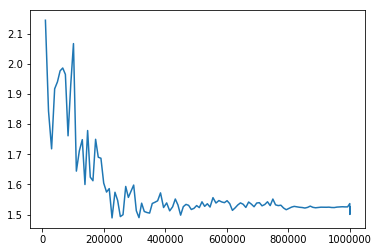

In [18]:
fig = plt.figure(1)
plt.title('Alexnet')
plt.plot(steps,perps)

In [23]:
steps = []
perps = []
for event in ["events.out.tfevents.1520583718.render1-neuroaicluster"]: 
    for summary in tf.train.summary_iterator("im2txt/evallogAVERAGES/" + event):
        if (summary.step not in steps) and summary.step:
            steps.append(summary.step)
        for v in summary.summary.value:
            if v.tag == 'Perplexity':
                perps.append(v.simple_value)
            
if (len(perps) != len(steps)):
    steps.extend([1000000]*(len(perps)-len(steps)))

(1.4, 2.1)

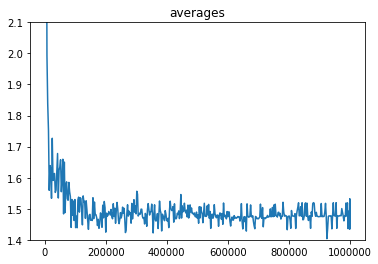

In [25]:
fig = plt.figure(1)
plt.title('averages')
plt.plot(steps,perps)
plt.ylim(1.4,2.1)

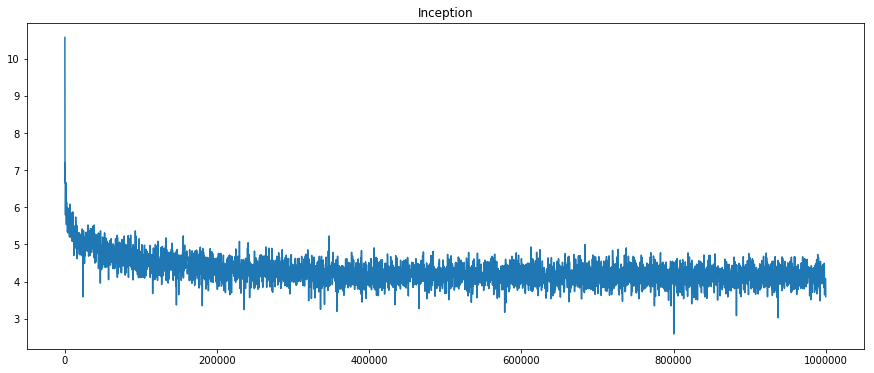

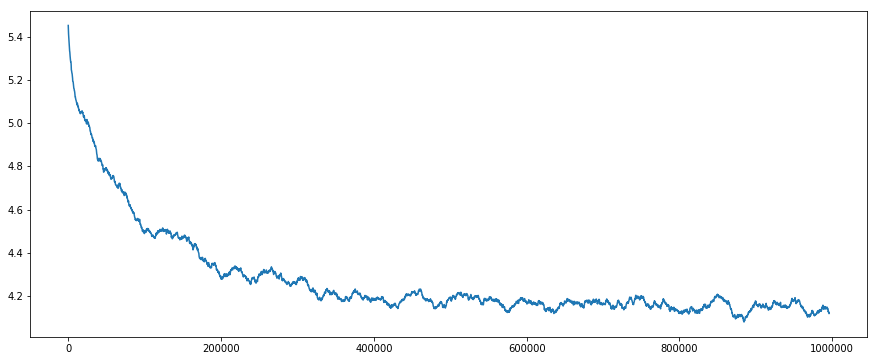

In [56]:
with open('im2txt/lossInc.txt','r') as f:
    losses = f.readlines()
del losses[0]
step = [int(loss.split()[0]) for loss in losses]
loss = [float(loss.split()[-1]) for loss in losses]
fig = plt.figure(figsize = (15, 6))
plt.title('Inception')
plt.plot(step,loss)

N_smooth = 100
smoothed_loss = signal.convolve(loss, np.ones((N_smooth,)))[N_smooth : -N_smooth] / float(N_smooth)
plt.figure(figsize = (15, 6))
step2 = [i*(1000000/(len(smoothed_loss)-1)) for i in range(len(smoothed_loss))]
plt.plot(step2,smoothed_loss)


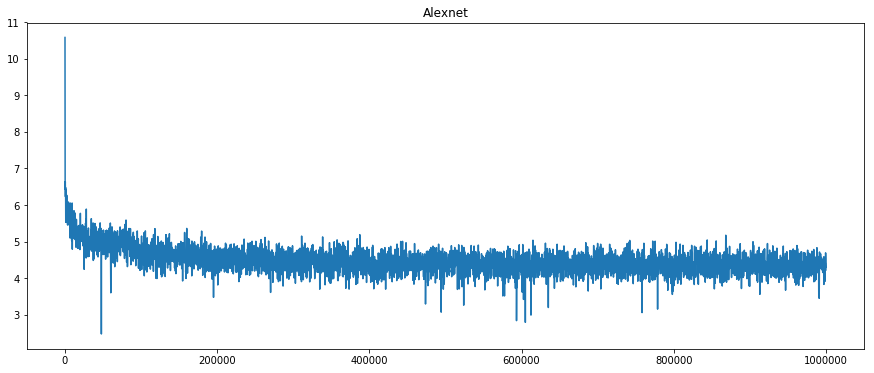

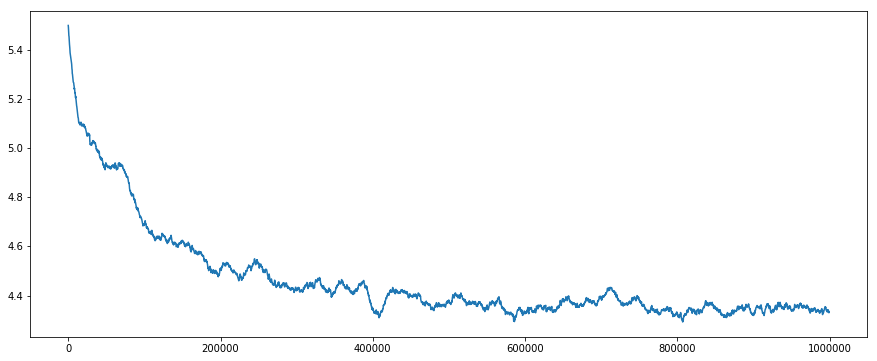

In [57]:
with open('im2txt/lossAlex.txt','r') as f:
    losses = f.readlines()
del losses[0]
step = [int(loss.split()[0]) for loss in losses]
loss = [float(loss.split()[-1]) for loss in losses]
fig = plt.figure(figsize = (15, 6))
plt.title('Alexnet')
plt.plot(step,loss)

N_smooth = 100
smoothed_loss = signal.convolve(loss, np.ones((N_smooth,)))[N_smooth : -N_smooth] / float(N_smooth)
plt.figure(figsize = (15, 6))
step2 = [i*(1000000/(len(smoothed_loss)-1)) for i in range(len(smoothed_loss))]
plt.plot(step2,smoothed_loss)

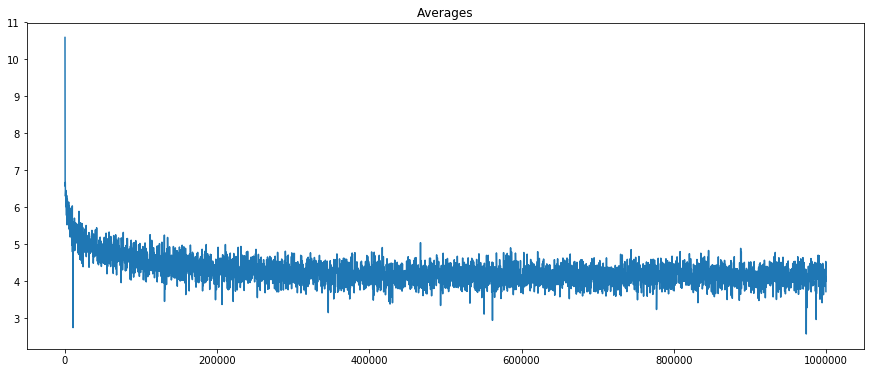

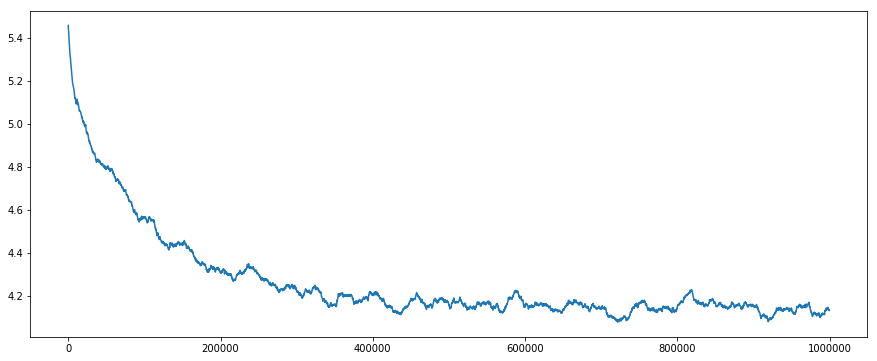

In [58]:
with open('im2txt/lossGavg.txt','r') as f:
    losses = f.readlines()
del losses[0]
step = [int(loss.split()[0]) for loss in losses]
loss = [float(loss.split()[-1]) for loss in losses]
fig = plt.figure(figsize = (15, 6))
plt.title('Averages')
plt.plot(step,loss)

N_smooth = 100
smoothed_loss = signal.convolve(loss, np.ones((N_smooth,)))[N_smooth : -N_smooth] / float(N_smooth)
plt.figure(figsize = (15, 6))
step2 = [i*(1000000/(len(smoothed_loss)-1)) for i in range(len(smoothed_loss))]
plt.plot(step2,smoothed_loss)


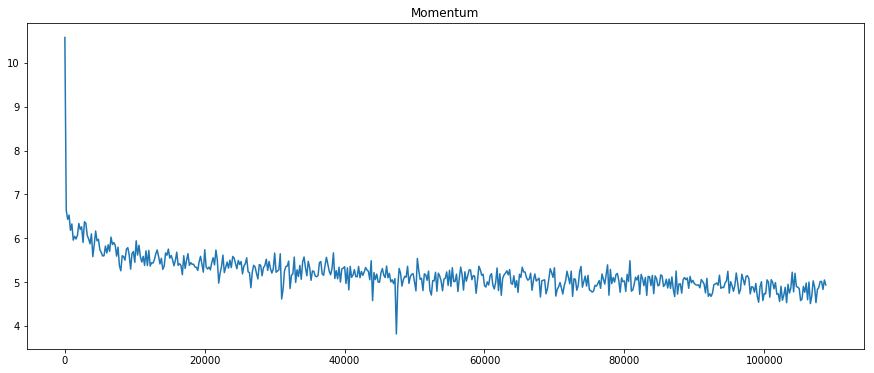

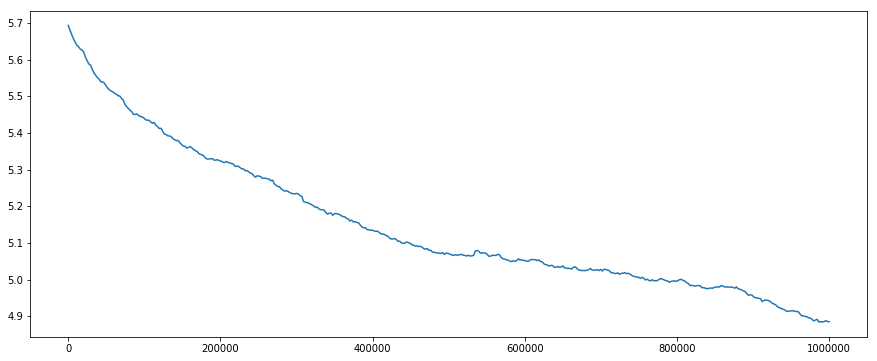

In [59]:
with open('im2txt/lossMom.txt','r') as f:
    losses = f.readlines()
del losses[0]
step = [int(loss.split()[0]) for loss in losses]
loss = [float(loss.split()[-1]) for loss in losses]
fig = plt.figure(figsize = (15, 6))
plt.title('Momentum')
plt.plot(step,loss)

N_smooth = 100
smoothed_loss = signal.convolve(loss, np.ones((N_smooth,)))[N_smooth : -N_smooth] / float(N_smooth)
plt.figure(figsize = (15, 6))
step2 = [i*(1000000/(len(smoothed_loss)-1)) for i in range(len(smoothed_loss))]
plt.plot(step2,smoothed_loss)

In [3]:
#SGD Incep
stepsSGD = []
perpsSGD = []
for event in ["events.out.tfevents.1521345288.project"]: 
    for summary in tf.train.summary_iterator("im2txt/evallogATTENTION/" + event):
        if (summary.step not in stepsSGD) and summary.step:
            stepsSGD.append(summary.step)
        for v in summary.summary.value:
            if v.tag == 'Perplexity':
                perpsSGD.append(v.simple_value)
            
if (len(perpsSGD) != len(stepsSGD)):
    stepsSGD.extend([600000]*(len(perpsSGD)-len(stepsSGD)))

(1.7, 10)

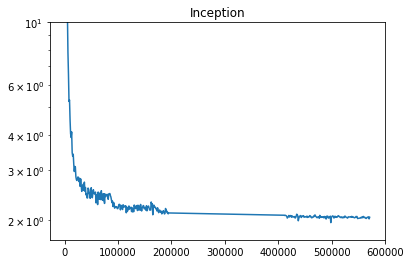

In [4]:
fig = plt.figure(1)
plt.title('Inception')
plt.plot(stepsSGD,perpsSGD)
plt.yscale('log')
plt.ylim(1.7,10)

In [5]:
#ALEX 600
steps = []
perps = []
for event in ["events.out.tfevents.1521248334.node8-neuroaicluster","events.out.tfevents.1521283678.node8-neuroaicluster"]: 
    for summary in tf.train.summary_iterator("im2txt/evallogGavg/" + event):
        if (summary.step not in steps) and summary.step:
            steps.append(summary.step)
        for v in summary.summary.value:
            if v.tag == 'Perplexity':
                perps.append(v.simple_value)
            
if (len(perps) != len(steps)):
    steps.extend([600000]*(len(perps)-len(steps)))

(1.7, 10)

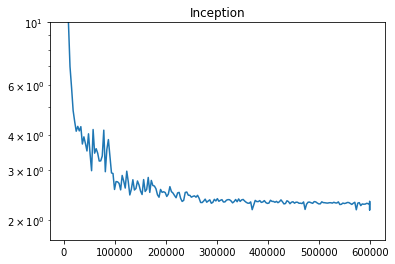

In [6]:
fig = plt.figure(1)
plt.title('Inception')
plt.plot(steps,perps)
plt.yscale('log')
plt.ylim(1.7,10)

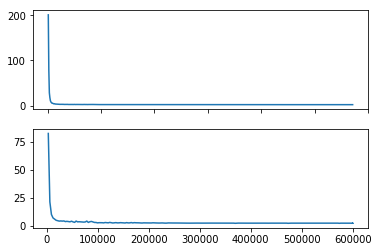

In [7]:
#t= np.arange(1000)/100.
#x = np.sin(2*np.pi*10*t)
#y = np.cos(2*np.pi*10*t)

fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(stepsSGD,perpsSGD)
ax2.plot(steps,perps)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])
# ax2.autoscale() ## call autoscale if needed

plt.show()

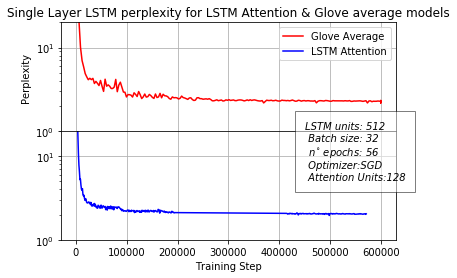

In [8]:
from matplotlib import gridspec

# Simple data to display in various forms
#x = np.linspace(0, 2 * np.pi, 400)
#y = np.sin(x ** 2)

fig = plt.figure()
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
# log scale for axis Y of the first subplot
ax0.set_yscale("log")
ax0.set_ylim(1,20)
plt.grid()
line0, = ax0.plot(steps, perps, color='r')
ax0.set_title('Single Layer LSTM perplexity for LSTM Attention & Glove average models')
ax0.set_ylabel('Perplexity')

#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.set_yscale("log")
ax1.set_ylim(1,20)
plt.grid()
ax1.text(450000, 5.2, 'LSTM units: 512\n Batch size: 32\n $n^{\circ}$ epochs: 56\n Optimizer:SGD \n Attention Units:128', style='italic',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':10})
line1, = ax1.plot(stepsSGD, perpsSGD, color='b', linestyle='-')
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
ax1.set_xlabel('Training Step')

# put lened on first subplot
ax0.legend((line0, line1), ('Glove Average', 'LSTM Attention'), loc='upper right')

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.0)
plt.show()